In [1]:
#1 import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, mixture
from sklearn.cluster import KMeans
import category_encoders as ce
import seaborn as sns
import random

In [2]:
#グラフ用の色分けの設定
color_dict = dict({'u-next':'cyan',
                   'dribens':'lime',
                   'konami':'green',
                   'furinkazan':'red',
                   'sega_sammy':'blue',
                   'raiden':'orange',
                   'sakura':'pink',
                   'abemas':'olive'
                  })

In [3]:
data = pd.read_csv('MLeague_players.csv')

In [4]:
data

,チーム,選手名,試合数,総局数,ポイント,平着,1位,2位,3位,4位,トップ率,連対率,ラス回避率,ベストスコア,平均打点,副露率,リーチ率,アガリ率,放銃率,放銃平均打点
0,konami,佐々木 寿人,30.0,399.0,494.1,2.10,13.0,6.0,6.0,5.0,0.43,0.63,0.83,94000.0,7788.88,0.18,0.31,0.24,0.10,7380.00
1,konami,高宮 まり,20.0,241.0,-246.0,2.80,3.0,4.0,7.0,6.0,0.15,0.35,0.70,47600.0,5807.89,0.19,0.22,0.15,0.13,4915.62
2,konami,前原 雄大,21.0,250.0,-251.8,2.76,4.0,5.0,4.0,8.0,0.19,0.42,0.61,56100.0,5374.00,0.23,0.20,0.20,0.10,7440.74
3,konami,藤崎 智,19.0,223.0,-164.8,2.63,3.0,6.0,5.0,5.0,0.15,0.47,0.73,58900.0,5702.70,0.17,0.17,0.16,0.14,5187.50
4,sakura,内川 幸太郎,26.0,304.0,468.7,2.13,12.0,4.0,5.0,5.0,0.46,0.61,0.80,76700.0,5696.47,0.25,0.19,0.27,0.11,5241.17
5,sakura,岡田 紗佳,15.0,178.0,33.6,2.46,4.0,4.0,3.0,4.0,0.26,0.53,0.73,54000.0,6284.37,0.17,0.26,0.17,0.11,5445.00
6,sakura,沢崎 誠,21.0,281.0,-280.6,2.85,3.0,4.0,7.0,7.0,0.14,0.33,0.66,66400.0,7197.50,0.17,0.18,0.14,0.12,4717.14
7,sakura,堀 慎吾,28.0,313.0,275.6,2.21,9.0,9.0,5.0,5.0,0.32,0.64,0.82,92900.0,7334.84,0.26,0.19,0.21,0.08,5457.14
8,abemas,多井 隆晴,25.0,286.0,234.4,2.27,7.0,10.0,2.0,6.0,0.28,0.68,0.76,67800.0,6807.46,0.21,0.19,0.23,0.08,5000.00
9,abemas,白鳥 翔,21.0,244.0,109.7,2.38,7.0,4.0,5.0,5.0,0.33,0.52,0.76,64700.0,7297.82,0.22,0.23,0.18,0.14,5230.55


In [61]:
# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
list_cols = ['チーム','選手名']

# 序数をカテゴリに付与して変換
ce_oe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df_session_ce_ordinal = ce_oe.fit_transform(data)

df_session_ce_ordinal.head()

data = data.join(df_session_ce_ordinal.add_suffix("_ordinal"))

/opt/anaconda3/envs/DS/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [62]:
#エンコーディングのマッピング結果確認
ce_oe.category_mapping

[{'col': 'チーム',
  'mapping': konami        1
  sakura        2
  abemas        3
  sega_sammy    4
  u-next        5
  furinkazan    6
  dribens       7
  raiden        8
  NaN          -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': '選手名',
  'mapping': 佐々木 寿人     1
  高宮 まり      2
  前原 雄大      3
  藤崎 智       4
  内川 幸太郎     5
  岡田 紗佳      6
  沢崎 誠       7
  堀 慎吾       8
  多井 隆晴      9
  白鳥 翔      10
  松本 吉弘     11
  日向 藍子     12
  魚谷 侑未     13
  近藤 誠一     14
  茅森 早香     15
  和久津 晶     16
  小林 剛      17
  朝倉 康心     18
  石橋 伸洋     19
  瑞原 明奈     20
  二階堂 亜樹    21
  滝沢 和典     22
  勝又 健志     23
  園田 賢      24
  村上 淳      25
  鈴木 たろう    26
  丸山 奏子     27
  萩原 聖人     28
  瀬戸熊 直樹    29
  黒沢 咲      30
  NaN       -2
  dtype: int64,
  'data_type': dtype('O')}]

In [63]:
test.head()

,チーム,選手名,試合数,総局数,ポイント,平着,1位,2位,3位,4位,...,トップ率_ordinal,連対率_ordinal,ラス回避率_ordinal,ベストスコア_ordinal,平均打点_ordinal,副露率_ordinal,リーチ率_ordinal,アガリ率_ordinal,放銃率_ordinal,放銃平均打点_ordinal
0,konami,佐々木 寿人,30.0,399.0,494.1,2.10,13.0,6.0,6.0,5.0,...,0.43,0.63,0.83,94000.0,7788.88,0.18,0.31,0.24,0.10,7380.00
1,konami,高宮 まり,20.0,241.0,-246.0,2.80,3.0,4.0,7.0,6.0,...,0.15,0.35,0.70,47600.0,5807.89,0.19,0.22,0.15,0.13,4915.62
2,konami,前原 雄大,21.0,250.0,-251.8,2.76,4.0,5.0,4.0,8.0,...,0.19,0.42,0.61,56100.0,5374.00,0.23,0.20,0.20,0.10,7440.74
3,konami,藤崎 智,19.0,223.0,-164.8,2.63,3.0,6.0,5.0,5.0,...,0.15,0.47,0.73,58900.0,5702.70,0.17,0.17,0.16,0.14,5187.50
4,sakura,内川 幸太郎,26.0,304.0,468.7,2.13,12.0,4.0,5.0,5.0,...,0.46,0.61,0.80,76700.0,5696.47,0.25,0.19,0.27,0.11,5241.17


In [59]:
test.columns

Index(['チーム', '選手名', '試合数', '総局数', 'ポイント', '平着', '1位', '2位', '3位', '4位',
       'トップ率', '連対率', 'ラス回避率', 'ベストスコア', '平均打点', '副露率', 'リーチ率', 'アガリ率', '放銃率',
       '放銃平均打点', 'チーム_ordinal', '選手名_ordinal', '試合数_ordinal', '総局数_ordinal',
       'ポイント_ordinal', '平着_ordinal', '1位_ordinal', '2位_ordinal', '3位_ordinal',
       '4位_ordinal', 'トップ率_ordinal', '連対率_ordinal', 'ラス回避率_ordinal',
       'ベストスコア_ordinal', '平均打点_ordinal', '副露率_ordinal', 'リーチ率_ordinal',
       'アガリ率_ordinal', '放銃率_ordinal', '放銃平均打点_ordinal'],
      dtype='object')

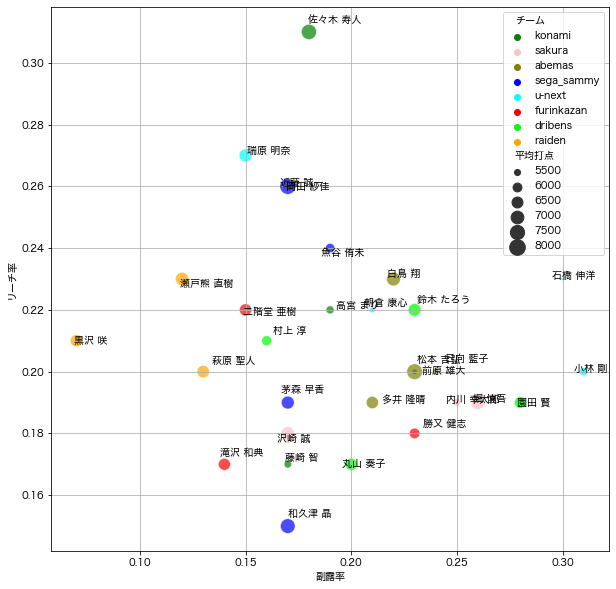

In [193]:
#チーム別で色分けしたプロット
plt.figure(figsize=(10,10))
sns.scatterplot(x='副露率',y='リーチ率',data=data,s=100,hue='チーム',alpha=0.7,palette=color_dict,size='平均打点',sizes=(10,250))
for x, y, name in zip(data['副露率'], data['リーチ率'], data['選手名']):
    plt.text(x+random.randint(-10,10)*0.0005, y+random.randint(-10,10)*0.0003, name)
plt.grid()

In [185]:
X = data[[ '副露率', 'リーチ率']]
X.index = data['チーム']
z = data['チーム']
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

In [189]:
km = KMeans(n_clusters=4,init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
km.fit(X_norm)
labels=km.predict(X_norm)

In [190]:
data['クラスタ'] = labels

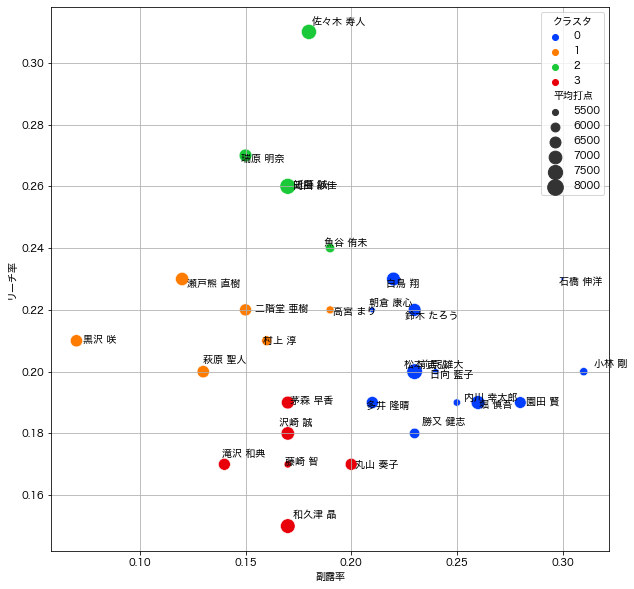

In [191]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='副露率',y='リーチ率',data=data,s=100,hue='クラスタ',palette='bright',size='平均打点',sizes=(10,250))
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red')
for x, y, name in zip(data['副露率'], data['リーチ率'], data['選手名']):
    plt.text(x+random.randint(-10,10)*0.0005, y+random.randint(-10,10)*0.0003, name)
plt.grid()

In [192]:
data.to_csv('result.csv',encoding='cp932')